In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special

In [2]:
def integ(x):
    return x*special.jv(0,x)
lra=[]
jar=[]
for llr in np.arange(-1.,2.,.01):
    lr=10.**llr
    j = integrate.quad(integ,0,lr)
    lra.append(lr)
    jar.append(j[0])

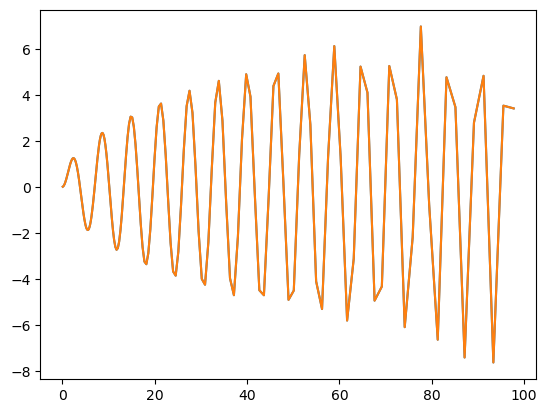

In [3]:
lra=np.array(lra)
plt.plot(lra,jar)
plt.plot(lra,lra*special.jv(1,lra))

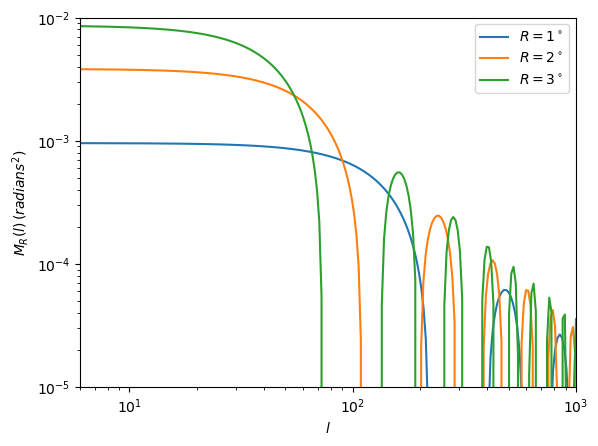

In [66]:
## The fourier transform of the window function is 2\pi R J_1(lR)/lR. Plot this for R=1 degree
deg=np.pi/180.
theta=1.*deg
l=lra/(theta)
plt.plot(l,theta*2*np.pi*special.jv(1,lra)/l,label='$R=1^\circ$')
theta=2.*deg
l=lra/(theta)
plt.plot(l,theta*2*np.pi*special.jv(1,lra)/l,label='$R=2^\circ$')
theta=3.*deg
l=lra/(theta)
plt.plot(l,theta*2*np.pi*special.jv(1,lra)/l,label='$R=3^\circ$')
plt.xlabel('$l$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$M_R(l)\, (radians^2)$')
plt.legend()
plt.axis([6,1000,1.e-5,1.e-2])
plt.savefig('../plots/mask.png')
# w(theta) is the fourier transform of CL, so roughly 
#. w = \int dl/l l^2C_l J_0(l\theta)
#plt.plot(l/6.,special.jv(0,lra))

In [5]:
def int2(x):
    return special.jv(1,x)**2/x
result=integrate.quad(int2,0.,1000.)
print(result)

(0.4996846633448955, 0.0009814749595783018)


/var/folders/yt/44r1mdln1k7_0595qvt97vd00000gn/T/ipykernel_80022/329343498.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result=integrate.quad(int2,0.,1000.)


## Normalization of $\Theta$
We require $$\int d^2\theta_1 \int d^2\theta_2 \delta_R(\vec\theta_1) \delta_R(\vec\theta_2) \Theta_\theta(|\vec\theta_1-\vec\theta_2|)$$
to reduce to $w(\theta)$. Taking out the $R$ subscript, this becomes
\begin{equation}
\int_R%_{\theta_i\ in R} 
d^2\theta_1 
\int_R d^2\theta_2%_{\theta_2\ in R} 
w(\vec\theta_1-\vec\theta_2) 
\Theta_\theta(|\vec\theta_1-\vec\theta_2|) \end{equation}
If $R$ were very large, then we could simply define $\theta_-=\theta_+-\theta_-$ and then do the $\theta_1$ integral yielding a factor of $A$, the area. Then we would require
$$ 1 = A \int_0^R d\theta\theta \Theta_\theta(\theta) \int_0^{2\pi} d\phi$$
or
$$1=2\pi A \theta \int_0^R d\theta \Theta_\theta(\theta)$$.
So $\Theta_\theta()$ is sharply peaked at its argument. If it has a width $\Delta\theta$, then
$$ \Theta_\theta(x) = \frac{1}{2\pi A\theta\Delta\theta} f_\theta(x)$$
where $f$ just constrains its argument in the integrand to be equal to $\theta$ and when integrated over yields a width of $\Delta\theta$.

## Fourier Transform of $\Theta$

$$\tilde\Theta_\theta(\vec l) = \int d^2\phi e^{i\vec l\cdot\vec\phi} \Theta_\theta(\vec\phi)$$
Since $\Theta$ depends only on the magnitude of its argument
\be
$$\tilde\Theta_\theta(\vec l) = \int_0^\infty d\phi\phi \Theta_\theta(\phi)\int_0^{2\pi} d\alpha e^{il\phi\cos\alpha}$$
The azimuthal integral is $2\pi J_0(l\phi)$, so
$$\tilde\Theta_\theta(\vec l) = 2\pi \int_0^\infty d\phi\phi \Theta_\theta(\phi) J_0(l\phi)$$
If we assume that $J_0$ is not oscillating too rapidly (meaning we are not in the regime $l\theta\gg 1$, then
$$\tilde\Theta_\theta(\vec l) = \frac{2\pi \theta J_0(l\theta)}{2\pi A\theta\Delta\theta} \int_0^\infty d\phi f_\theta(\phi) $$
or
$$\tilde\Theta_\theta(\vec l) = \frac{J_0(l\theta)}{A} $$



Carry out the 2D integral that define $F_R(L)$. The inner part is $$\int_0^{2\pi}d\phi \cos\phi J_1(y\sqrt{1+x^2-2x\cos\phi})/\sqrt{1+x^2-2x\cos\phi} $$

In [6]:
def phiint(phi,x,y):
    c=np.cos(phi)
    dist=np.sqrt(1+x**2-2*x*c)
    if (dist <= 1.e-6):
        return c*y*.5 # limit of J_1(x)=x/2
    else:
        return c*special.jv(1,y*dist)/dist
phia=np.arange(0,np.pi,.01)
plt.plot(phia/np.pi,phiint(phia,1,1),label='$y=1$')
plt.plot(phia/np.pi,phiint(phia,1,10),label='$y=10$')
plt.plot(phia/np.pi,phiint(phia,1,.1),label='$y=.1$')
plt.legend()
plt.xlabel('$\phi/\pi$')
plt.ylabel('$\phi$ Integrand with $x=1$')
plt.savefig('../plots/phiint.png')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [7]:
plt.plot(phia/np.pi,phiint(phia,1,10),label='$x=1$')
plt.plot(phia/np.pi,phiint(phia,10,10),label='$x=10$')
plt.plot(phia/np.pi,phiint(phia,.1,10),label='$x=.1$')
plt.legend()
plt.xlabel('$\phi/\pi$')
plt.ylabel('$\phi$ Integrand with $y=10$')
plt.savefig('../plots/phiinty10.png')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

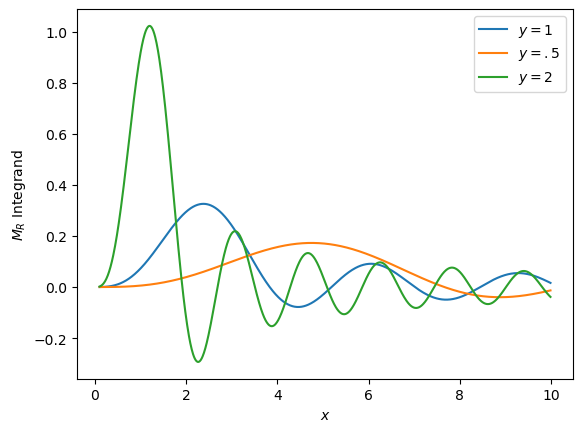

In [71]:
xa=np.arange(.1,10.,.01)
frx=[]
y=1
for i,x in enumerate(xa):
    result=2*integrate.quad(phiint,0.,np.pi,args=(x,y))
    frx.append(result[0]*x*special.jv(1,x*y))
plt.plot(xa,frx,label='$y=1$')
y=.5
frx=[]
for i,x in enumerate(xa):
    result=2*integrate.quad(phiint,0.,np.pi,args=(x,y))
    frx.append(result[0]*x*special.jv(1,x*y))
plt.plot(xa,frx,label='$y=.5$')
y=2.
frx=[]
for i,x in enumerate(xa):
    result=2*integrate.quad(phiint,0.,np.pi,args=(x,y))
    frx.append(2*result[0]*x*special.jv(1,x*y))
plt.plot(xa,frx,label='$y=2$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$M_R$ Integrand')
plt.savefig('../plots/mrint.png')


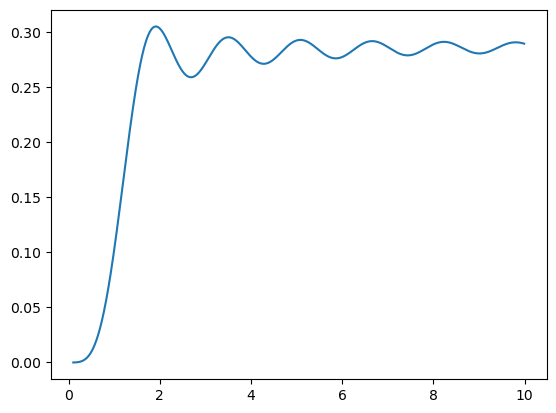

In [72]:
#Let's see how quickly/if the x-integral converges for the high-y case:
dx=.01
frx=np.array(frx)
mrx=np.zeros(np.size(frx))
mrx[0]=frx[0]*dx
for i in range(1,np.size(frx)):
    mrx[i]=mrx[i-1]+frx[i]*dx
mrx/=np.pi
plt.plot(xa,mrx)

In [73]:
# So, it looks like you need to integrate out to N/y
dx=.01
ya=np.arange(.1,5.,.2)
mr=np.zeros(np.size(ya))
for i,y in enumerate(ya):
    xa=np.arange(.01,6/y,dx)
    for x in xa:
        result=integrate.quad(phiint,0.,np.pi,args=(x,y))
        mr[i]+=2*result[0]*x*special.jv(1,x*y)*dx/np.pi
    #print(y,mr[i])

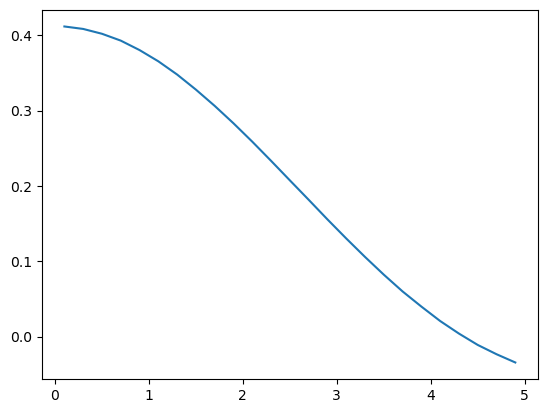

In [74]:
plt.plot(ya,mr)

In [76]:
dx=.01
ya=np.arange(.1,10.,.2)
mr=np.zeros(np.size(ya))
for i,y in enumerate(ya):
    xa=np.arange(.01,20/y,dx)
    for x in xa:
        result=integrate.quad(phiint,0.,np.pi,args=(x,y))
        mr[i]+=2*result[0]*x*special.jv(1,x*y)*dx/np.pi
    #print(y,mr[i])

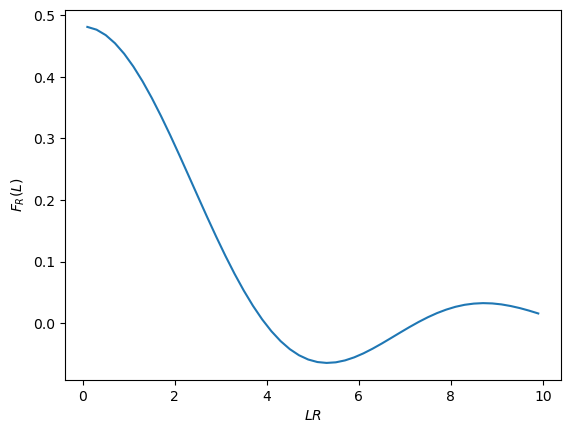

In [77]:
plt.plot(ya,mr)
plt.xlabel('$LR$')
plt.ylabel('$F_R(L)$')
plt.savefig('../plots/mr.png')

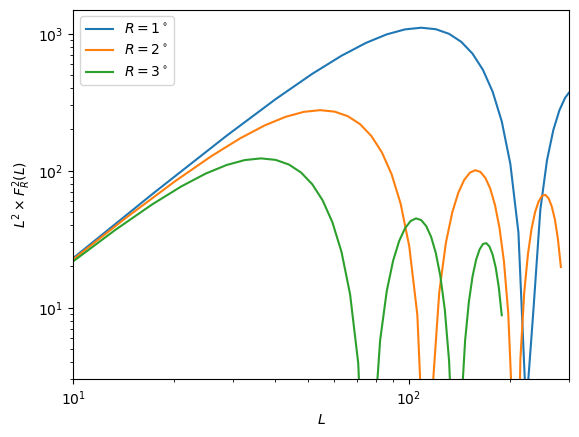

In [79]:
R=1*deg
plt.plot(ya/R,ya**2*mr**2/R**2,label='$R=1^\circ$')
R=2*deg
plt.plot(ya/R,ya**2*mr**2/R**2,label='$R=2^\circ$')
R=3*deg
plt.plot(ya/R,ya**2*mr**2/R**2,label='$R=3^\circ$')
plt.xlabel('$L$')
plt.ylabel('$L^2\\times F_R^2(L)$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.axis([10,300,3,1.5e3])
plt.savefig('../plots/mrsq.png')

First determine the optimal value of $\theta$, the one that maximizes $\theta^2 (\nabla T)^2$

In [14]:
import camb
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

In [15]:
results = camb.get_results(pars)

In [87]:
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
clphiphi = results.get_lens_potential_cls(lmax=2000)

for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


RMS fluctuations are 12091.31204375405  (\mu K)^2


Text(0, 0.5, '$\\theta^2 \\langle (\\nabla T)^2 \\rangle (\\mu K)^2$')

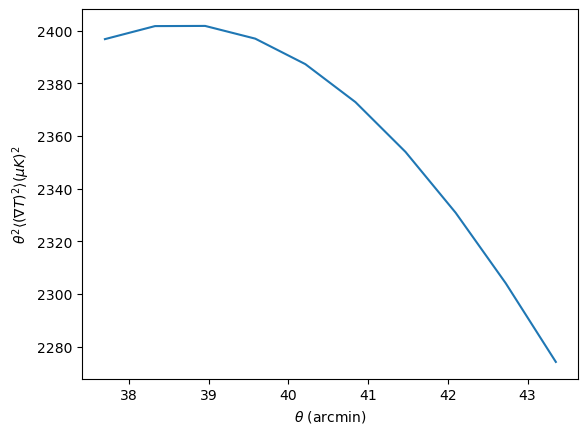

In [41]:
deg=np.pi/180
cltt=powers['total'] # assuming this is l^2C_l/2\pi
ls = np.arange(cltt.shape[0])
thetaa=np.arange(.6,.7,.01)*deg#/60.
result=np.zeros(np.size(thetaa))
print('RMS fluctuations are',np.sum(cltt[1:,0]/ls[1:]),' (\mu K)^2')
# THis is ~ \sum (2l+1) C_l/4\pi
for i,theta in enumerate(thetaa):
    result[i]=np.sum(cltt[:,0]*special.jv(1,ls*theta))*0.5*theta
plt.plot(thetaa*60*60,result)
plt.xlabel('$\\theta$ (arcmin)')
plt.ylabel('$\\theta^2 \\langle (\\nabla T)^2 \\rangle (\\mu K)^2$')

Text(0, 0.5, '$C(\\theta) (\\mu K)^2$')

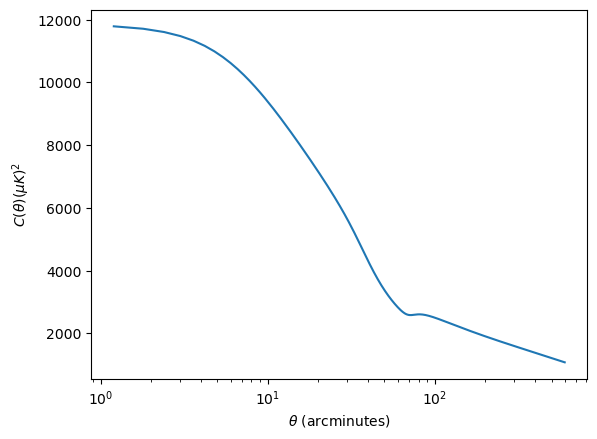

In [148]:
deg=np.pi/180
ta = np.arange(.02,10,.01)*deg
c=np.zeros(np.size(ta))
for i,theta in enumerate(ta):
    for l in (ls[2:]):
        c[i]+=(2*l+1)*cltt[l,0]*special.eval_legendre(l,np.cos(theta))/(l*(l+1))
plt.plot(ta*60/deg,c/(2))
plt.xscale('log')
plt.xlabel('$\\theta$ (arcminutes)')
plt.ylabel('$C(\\theta) (\mu K)^2$')

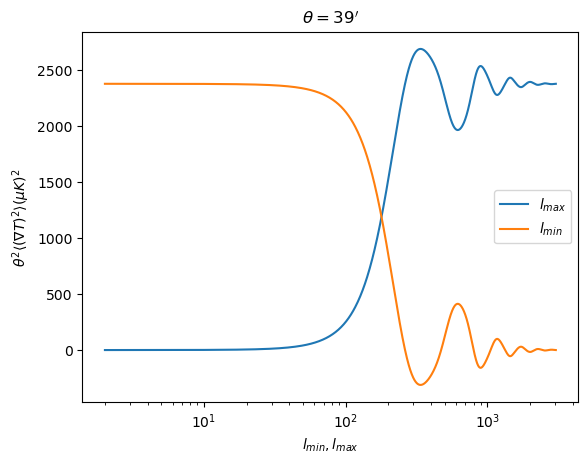

In [82]:
#What is the contribution to this sum from l?
theta=39*deg/60.
lmax=np.arange(2,np.max(ls),1)
cum=np.zeros(np.size(lmax))
for i,l in enumerate(lmax):
    cum[i]=np.sum(cltt[:l,0]*special.jv(1,ls[:l]*theta))
plt.plot(lmax,cum*0.5*theta,label='$l_{max}$')
cum=np.zeros(np.size(lmax))
for i,l in enumerate(lmax):
    cum[i]=np.sum(cltt[l:,0]*special.jv(1,ls[l:]*theta))
plt.plot(lmax,cum*0.5*theta,label='$l_{min}$')
plt.xlabel('$l_{min},l_{max}$')
plt.ylabel('$\\theta^2 \\langle (\\nabla T)^2 \\rangle (\\mu K)^2$')
plt.xscale('log')
plt.title('$\\theta=39\'$')
plt.legend()
plt.savefig('../plots/dlntheta.png')

[  5.72957795  17.18873385  28.64788976  40.10704566  51.56620156
  63.02535746  74.48451337  85.94366927  97.40282517 108.86198107]


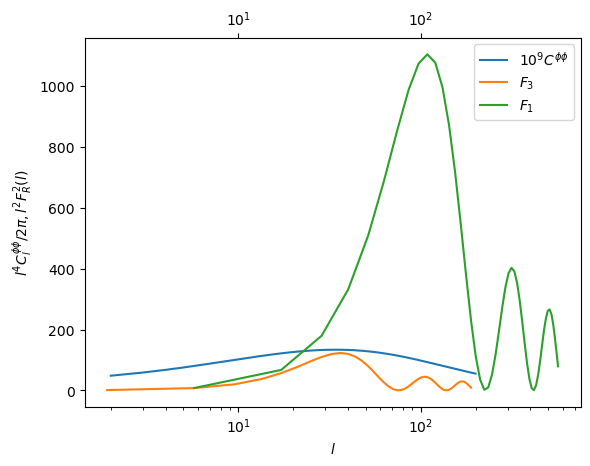

In [114]:
plt.plot(ls[2:201],clphiphi[2:201,0]*10**9,label='$10^9 C^{\phi\phi}$')
plt.xscale('log')
plt.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
R=3*deg
plt.plot(ya/R,ya**2*mr**2/R**2,label='$F_3$')
R=1*deg
plt.plot(ya/R,ya**2*mr**2/R**2,label='$F_1$')
plt.xlabel('$l$')
plt.ylabel('$l^4C_l^{\phi\phi}/2\pi, l^2F_R^2(l)$')
plt.legend()
print(ya[:10]/R)

1.6391969544320448e-05
0.00010697021814011116


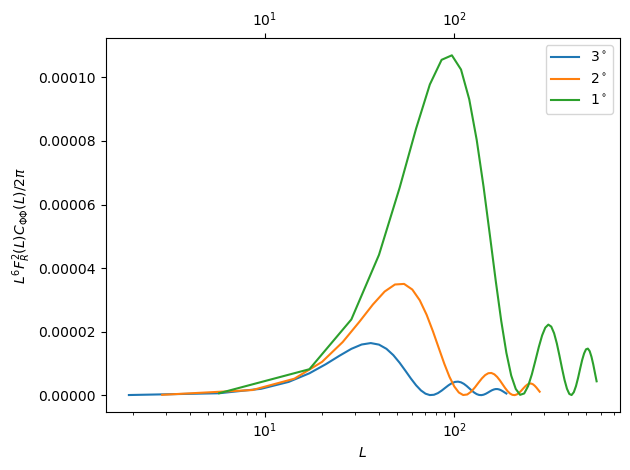

In [127]:
R=3*deg
clarr=np.interp(ya/R,ls[:1000],clphiphi[:1000,0])
wrintegrand = ya**2*mr**2/R**2*clarr 
plt.plot(ya/R,wrintegrand,label='$3^\circ$')
print(np.max(wrintegrand))
R=2*deg
clarr=np.interp(ya/R,ls[2:201],clphiphi[2:201,0])
wrintegrand = ya**2*mr**2/R**2*clarr 
plt.plot(ya/R,wrintegrand,label='$2^\circ$')
R=1*deg
clarr=np.interp(ya/R,ls[2:201],clphiphi[2:201,0])
wrintegrand = ya**2*mr**2/R**2*clarr 
print(np.max(wrintegrand))
plt.plot(ya/R,wrintegrand,label='$1^\circ$')
plt.xscale('log')
plt.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
plt.xlabel('$L$')
plt.ylabel('$L^6 F_R^2(L) C_{\Phi\Phi}(L)/2\pi$')
plt.legend()
plt.tight_layout()
plt.savefig('../plots/wrint.png')
